## Using selected questions from the 2012 and 2014 editions of the European Social Survey, the same participants answered questions in 2012 and again 2014, address the following questions.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
1. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
1. Who reported watching more TV in 2012, men or women?
1. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
1. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
1. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Data Dictionary:
https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html

In [48]:
import numpy as np
from scipy import stats

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
# plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('fivethirtyeight')

C:\Users\mrkjh\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\mrkjh\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\mrkjh\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# import data
url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [119]:
df.isna().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     10
pplfair      0
pplhlp      17
happy       30
sclmeet     15
sclact      87
gndr        10
agea       237
partner     16
dtype: int64

In [6]:
df.shape

(8594, 13)

### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

Since we are comparing country over country, these are dependent groups, as a result I will use a paired t-test.


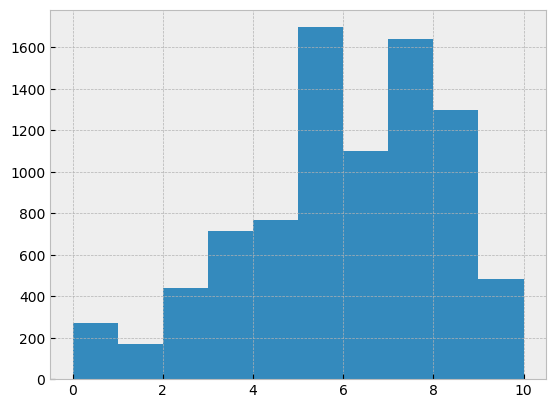

In [46]:
df.loc[:, 'ppltrst'].hist()

Not completely normal distribution, but close.

In [59]:
# aggregate data for each country and year
df.groupby(['cntry', 'year'])['ppltrst'].mean().unstack()

year,6,7
cntry,,
CH,5.677878,5.751617
CZ,4.362519,4.424658
DE,5.214286,5.357143
ES,5.114592,4.895128
NO,6.649315,6.598630
SE,6.058499,6.257709


In [58]:
# in this situation, I'm going to want a paired t-test
stats.ttest_rel(df.groupby(['cntry', 'year'])['ppltrst'].mean().unstack().loc[:,6],
                df.groupby(['cntry', 'year'])['ppltrst'].mean().unstack().loc[:,7])

Ttest_relResult(statistic=-0.5644744778679546, pvalue=0.59681274401552)

Because of the large p-value, (greater than 0.05) we cannot reject the null hypothesis of identical average scores.  So, people did not become less trusting.

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

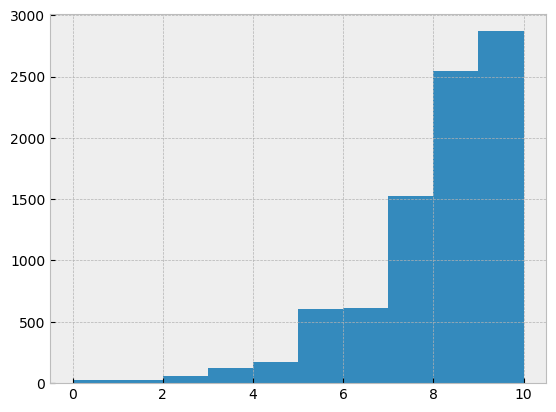

In [62]:
df.loc[:, 'happy'].hist()

Definitely not a normal distribution.

In [60]:
# aggregate data for each country and year
df.groupby(['cntry', 'year'])['happy'].mean().unstack()

year,6,7
cntry,,
CH,8.088312,8.116429
CZ,6.770898,6.914110
DE,7.428571,7.857143
ES,7.548680,7.419967
NO,8.251719,7.915185
SE,7.907387,7.946961


In [61]:
# try with paired t-test
stats.ttest_rel(df.groupby(['cntry', 'year'])['happy'].mean().unstack().loc[:,6],
                df.groupby(['cntry', 'year'])['happy'].mean().unstack().loc[:,7])

Ttest_relResult(statistic=-0.27632222918551874, pvalue=0.7933584312303786)

Due to the non-normality of the date, it doesn't seem appropriate to rely on this.

In [85]:
# instead use the Kruskal-Wallace Test

stats.kruskal(stats.rankdata(df.groupby(['cntry', 'year'])['happy'].mean().unstack().loc[:,6]),
              stats.rankdata(df.groupby(['cntry', 'year'])['happy'].mean().unstack().loc[:,7]))

KruskalResult(statistic=0.0, pvalue=1.0)

Unsure why the statistic for this is zero after using rankdata to try to compensate for the non-normality of the data.

In [ ]:
# Kruskal-Wallace Test

# Join all ratings together into a list, then ranking them.
# ranks = stats.rankdata(
#     roller_coasters['Europe'].tolist() +
#     roller_coasters['LatinAmerica'].tolist() +
#     roller_coasters['NorthAmerica'].tolist())

# # Add the new ranked variables to the data frame.
# roller_coasters['Ranks_Europe'] = ranks[0:20]
# roller_coasters['Ranks_LatinAmerica'] = ranks[20:40]
# roller_coasters['Ranks_NorthAmerica'] = ranks[40:60]

# # Average rank per group.
# groups = ['Ranks_Europe', 'Ranks_LatinAmerica', 'Ranks_NorthAmerica']
# print(roller_coasters[groups].apply(np.mean))

# # Overall average rank.
# print(np.mean(ranks))

# # Print the test statistic followed by the probability of getting this result
# # if the groups were not different.
# stats.kruskal(
#     roller_coasters['Europe'],
#     roller_coasters['LatinAmerica'],
#     roller_coasters['NorthAmerica'])

### 3. Who reported watching more TV in 2012, men or women?

We aren't specifically comparing the same people or countries, so this isn't a paired t-test, instead this is an independent t-test.  The number of observations in each category are different.

In [124]:
# remove nan values
df.dropna(subset=['tvtot'], inplace=True)

In [75]:
# translate male/female to be more readable
df.gndr.replace({1: 'male',
2: 'female'}, inplace=True)

In [77]:
df[df.year == 6].loc[:,['tvtot', 'gndr']]

,tvtot,gndr
0,3.0,female
1,6.0,female
2,1.0,male
3,4.0,female
4,5.0,female
...,...,...
7681,1.0,female
7682,3.0,female
7683,4.0,male
7684,0.0,female


In [78]:
df[df.year == 6].groupby(['gndr'])['tvtot'].mean()

gndr
female    3.944393
male      3.901906
Name: tvtot, dtype: float64

Women reported more tv use.

In [80]:
df[df.year == 6].groupby(['gndr'])['tvtot'].median()

gndr
female    4.0
male      4.0
Name: tvtot, dtype: float64

In [125]:
stats.ttest_ind(df[(df.year == 6) &
  (df.gndr == 'male')].loc[:,'tvtot'],
                df[(df.year == 6) &
  (df.gndr == 'female')].loc[:,'tvtot'])

Ttest_indResult(statistic=-0.8269748615391246, pvalue=0.4082975303357471)

Since the p-value is larger than 5% we accept the null hypothesis of equal averages, meaning that there is not a statistically significant difference in tv watching between men and women.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
Similar to the above, we aren't specifically comparing the same people or countries, so this isn't a paired t-test, instead this is an independent t-test.  The number of observations in each category are different.

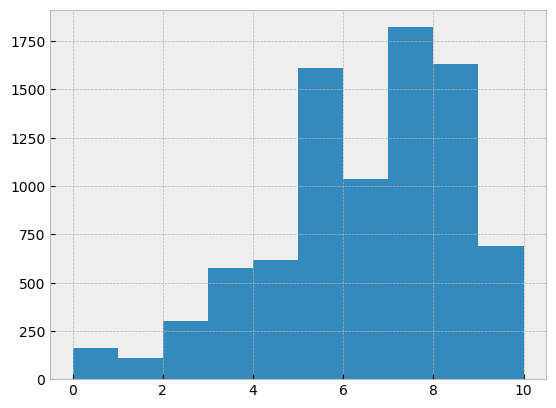

In [93]:
df.pplfair.hist()

Not quite normal distribution, but close.

In [89]:
# translate partner/no partner to be more readable
df.partner.replace({1: 'partner',
2: 'no partner'}, inplace=True)

In [113]:
# remove nan values
df.dropna(subset=['pplfair'], inplace=True)

In [91]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,female,60.0,partner
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,female,59.0,partner
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,male,24.0,no partner
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,female,64.0,partner
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,female,55.0,partner


In [98]:
df[df.year == 6].groupby(['partner'])['pplfair'].count()

partner
no partner    1608
partner       2663
Name: pplfair, dtype: int64

In [92]:
df[df.year == 6].groupby(['partner'])['pplfair'].mean()

partner
no partner    5.856965
partner       6.080736
Name: pplfair, dtype: float64

People living with a partner seem to report more fairness.

In [116]:
stats.ttest_ind(df[(df.year == 6) &
  (df.partner == 'partner')].loc[:,'pplfair'],
                df[(df.year == 6) &
  (df.partner == 'no partner')].loc[:,'pplfair'])

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609883756)

Since the p-value is smaller the 5% we reject the null hypothesis of equal averages, meaning that there is a statistically significant difference in fairness as reported by people living with a partner and those living without a partner.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?


In [127]:
df.year.value_counts()

6    4271
7    4266
Name: year, dtype: int64

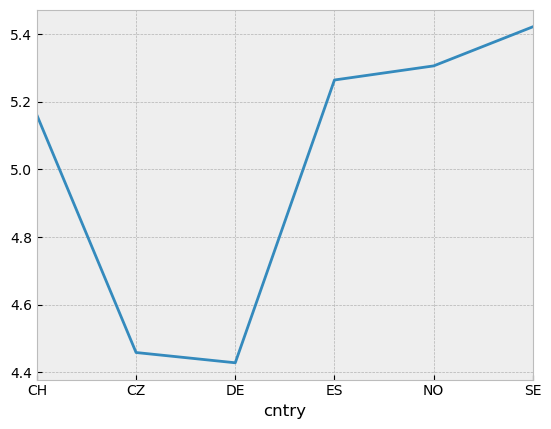

In [132]:
df[df.year == 7].groupby(['cntry'])['sclmeet'].mean().plot()

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


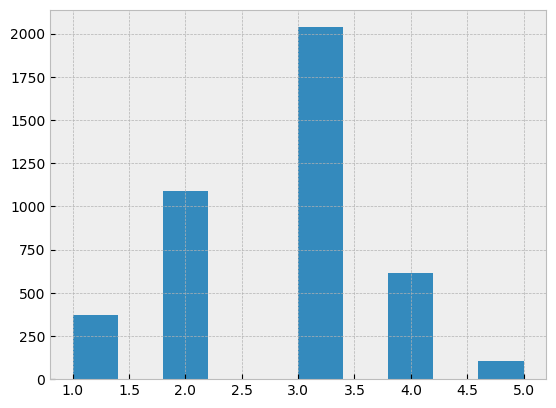

In [170]:
df[df.year == 7].loc[:,'sclact'].hist()

This appears to be normally distributed.

In [137]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,female,60.0,partner
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,female,59.0,partner
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,male,24.0,no partner
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,female,64.0,partner
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,female,55.0,partner


In [143]:
df[df.year == 7].groupby(['cntry'])['sclact'].mean()

cntry
CH    2.781699
CZ    2.701563
DE    2.714286
ES    2.624573
NO    2.860082
SE    2.880133
Name: sclact, dtype: float64

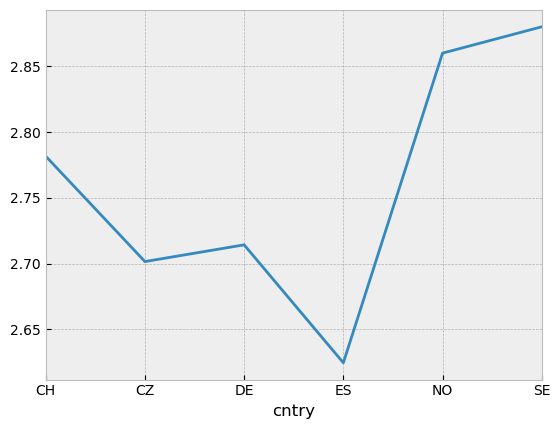

In [144]:
df[df.year == 7].groupby(['cntry'])['sclact'].mean().plot()

In [181]:
df.loc[df.year == 7, 'cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [162]:
df.loc[(df.year == 7) &
      (df.cntry == 'CH')].loc[:,'sclact'].shape

(773,)

In [163]:
df.loc[(df.year == 7) &
      (df.cntry == 'CZ')].loc[:,'sclact'].shape

(648,)

In [187]:
df.loc[(df.year == 7) &
      (df.cntry == 'SE')].loc[:,'sclact'].shape

(904,)

In [180]:
df

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,female,60.0,partner
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,female,59.0,partner
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,male,24.0,no partner
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,female,64.0,partner
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,female,55.0,partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,SE,3729.0,7,3.0,4.0,5.0,3.0,6.0,6.0,2.0,male,18.0,no partner
8590,SE,3732.0,7,5.0,6.0,4.0,4.0,10.0,6.0,3.0,male,15.0,no partner
8591,SE,3743.0,7,4.0,5.0,7.0,6.0,8.0,6.0,3.0,male,44.0,no partner
8592,SE,3744.0,7,5.0,8.0,8.0,6.0,9.0,7.0,3.0,male,15.0,no partner


Each of these are a different length for each country.  Is that why I'm getting nan values below?

In [226]:
# select an equal length of data for each country
three_countries = pd.concat([
    df.loc[(df.year == 7) &
      (df.cntry == 'CH')].loc[:,'sclact'].reset_index(drop=True),
    df.loc[(df.year == 7) &
      (df.cntry == 'CZ')].loc[:,'sclact'].reset_index(drop=True),
    df.loc[(df.year == 7) &
      (df.cntry == 'SE')].loc[:,'sclact'].reset_index(drop=True)
], axis=1, ignore_index=True).dropna().rename({
    0: 'CH',
    1: 'CZ',
    2: 'SE'
}, axis=1)

In [228]:
three_countries

,CH,CZ,SE
0,4.0,4.0,4.0
1,3.0,1.0,2.0
2,5.0,3.0,3.0
3,2.0,3.0,2.0
4,2.0,3.0,2.0
...,...,...,...
642,3.0,5.0,3.0
644,3.0,1.0,2.0
645,3.0,2.0,2.0
646,3.0,3.0,3.0


In [229]:
F, p = stats.f_oneway(
    three_countries.loc[:,'CH'],
    three_countries.loc[:,'CZ'],
    three_countries.loc[:,'SE'])

In [230]:
F, p

(4.9631097590234265, 0.007082109207437559)

Since the p-value is smaller than 5% we reject the null hypothesis of equal averages, meaning that there is statistically significant difference in how often people took part in social activities, relative to others their age, in 2014.

### But which countries are specifically different?

In [231]:
print(stats.ttest_ind(three_countries.loc[:,'CH'], three_countries.loc[:,'CZ']))
print(stats.ttest_ind(three_countries.loc[:,'CH'], three_countries.loc[:,'SE']))
print(stats.ttest_ind(three_countries.loc[:,'SE'], three_countries.loc[:,'CZ']))

Ttest_indResult(statistic=1.5218364074472257, pvalue=0.12829979628611793)
Ttest_indResult(statistic=-1.5986444922403389, pvalue=0.11014914474712476)
Ttest_indResult(statistic=3.2111432157276063, pvalue=0.0013553202418354346)


SE and CZ is the only country combination with a low enough p-value to accept the null hypothesis of equal averages.